# Testing PMT with UV laser in beam characterization chamber

- Hamamatsu R375 PMT
- SRS445A amplifier @125x amplification
- SRS HV PSU
- EF120 10kOHm Thorlabs low pass filter
- NI PXIe-5171 Oscilloscope

Roughly 13-15 mW UV light; not monitored during measurements; should use monitoring for next run.

# Summary of measurements

Note that the measurements are not calibrated against UV laser power; currently have no power monitoring.

## SRS445A 50 Ohm vs 500 Ohm input impedance with low pass filter
Offset is calibrated with respect to the offset with no UV present and room lights off. 50 Ohm/ 500 Ohm measurements were taken with significant time between them; long term power drift may cause significant distortion here.

| | Noise (mV ptp)| Offset (mV) |
| :---|---:|---:|
| 50 Ohm | 1.83 | -6.94 |
| 500 Ohm | 4.53 | -19.80 |
|ratio | 2.48 | 2.85 |

## Low pass vs no low pass filter @ SRS445A 50 Ohm input impedance 
Offset is calibrated with respect to the offset with no UV present and room lights off.

||Noise (mV ptp)| Offset (mv) | 
| --- | --- | --- |
| low pass | 1.83 | 5.57 |
| no low pass | 407 | 90.60 |

## Lights off; UV off vs Lights off; UV on @ SRS445A 50 Ohm input impedance with low pass filter
||Noise (mV ptp)| Offset (mv) | 
| --- | --- | --- |
| UV off | 1.14 | -2.28 |
| UV on| 1.83 | -7.95|
| UV on 2 | 1.02 | -7.66 |

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def quick_analyze(fname):
    with h5py.File(fname) as f:
        datasets = f['wfm_group0']
        scale_coef = datasets['axes']['axis1']['scale_coef']
        y = datasets['axes']['axis1']['data_vector']['data'].value*scale_coef[1]
        x = np.linspace(0,len(y)-1,len(y))*2.5e-5
        
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(x,y)
    ax.set_xlabel('[s]')
    ax.set_ylabel('[V]')
    ax.set_title(fname.split('/')[-1].strip('.hws'))
    print('mean signal : {0:.2e} V'.format(y.mean()))
    print('ptp signal : {0:.2e} V'.format(y.ptp()))

# No Lowpass filter, 50 Ohm input impedance SRS445A, 125x amplification

## Lights on; UV off

mean signal : -5.70e-01 V
ptp signal : 9.14e-01 V


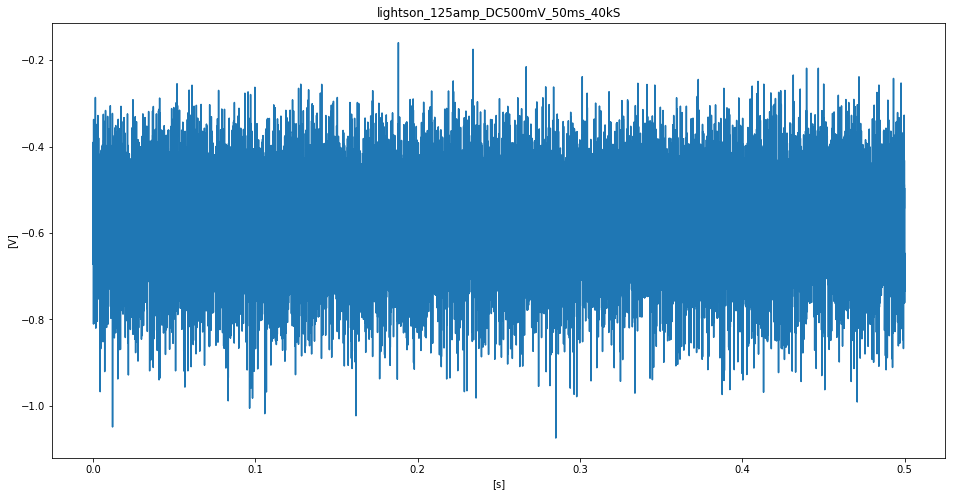

In [3]:
data_loc = "Data/2018_12_19/50Ohm_inputamp/"
fname = "lightson_125amp_DC500mV_50ms_40kSs.hws"
quick_analyze(data_loc+fname)

## Lights off; UV off

mean signal : 1.01e-03 V
ptp signal : 1.16e-01 V


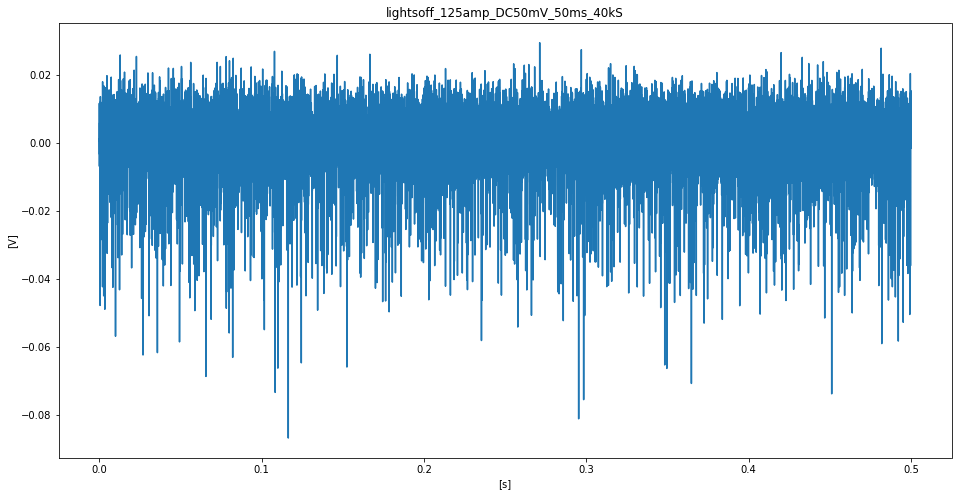

In [4]:
fname = "lightsoff_125amp_DC50mV_50ms_40kSs.hws"
quick_analyze(data_loc+fname)

## Lights off; UV on

mean signal : -9.06e-02 V
ptp signal : 4.07e-01 V


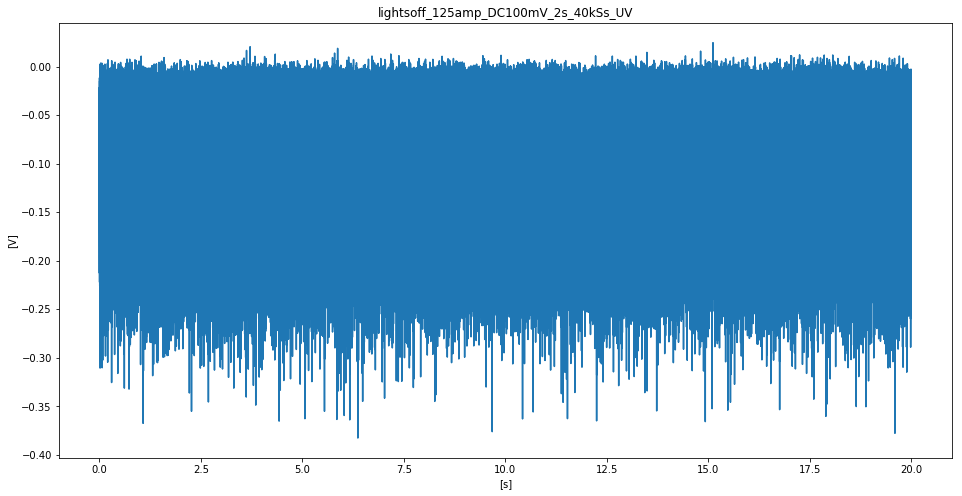

In [5]:
fname = "lightsoff_125amp_DC100mV_2s_40kSs_UV.hws"
quick_analyze(data_loc+fname)

# Lowpass filter, 50 Ohm input impedance SRS445A, 125x amplification

## Lights on; UV off

mean signal : -3.07e-02 V
ptp signal : 1.14e-03 V


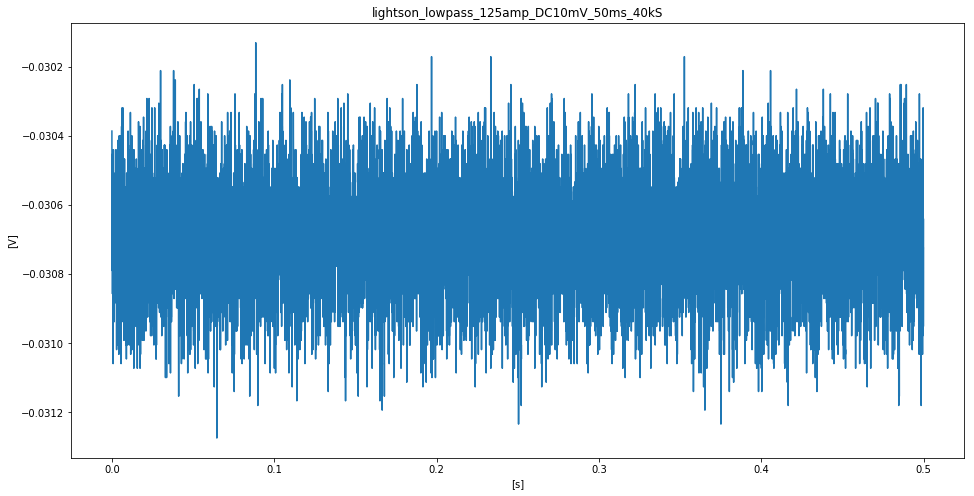

In [6]:
fname = "lightson_lowpass_125amp_DC10mV_50ms_40kSs.hws"
quick_analyze(data_loc+fname)

## Lights off; UV off

mean signal : -2.28e-03 V
ptp signal : 6.32e-04 V


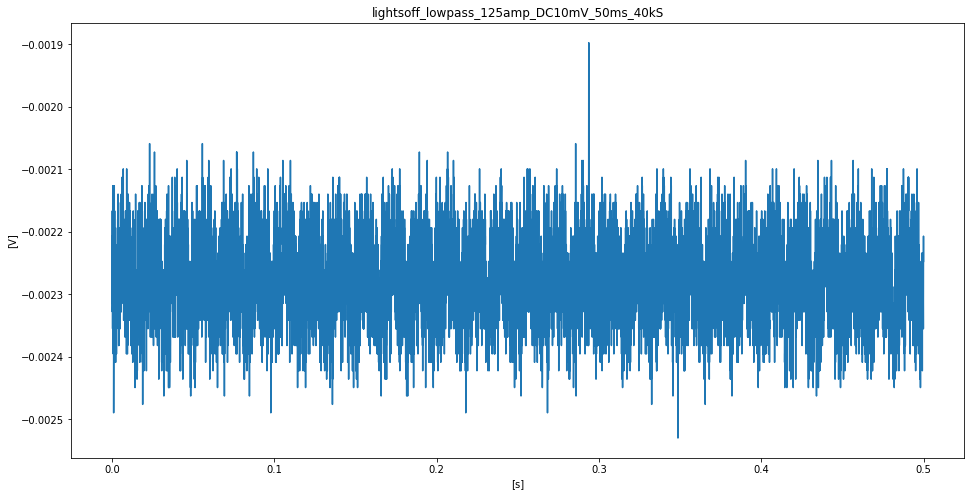

In [7]:
fname = "lightsoff_lowpass_125amp_DC10mV_50ms_40kSs.hws"
quick_analyze(data_loc+fname)

## Lights off; UV on

mean signal : -7.95e-03 V
ptp signal : 1.83e-03 V


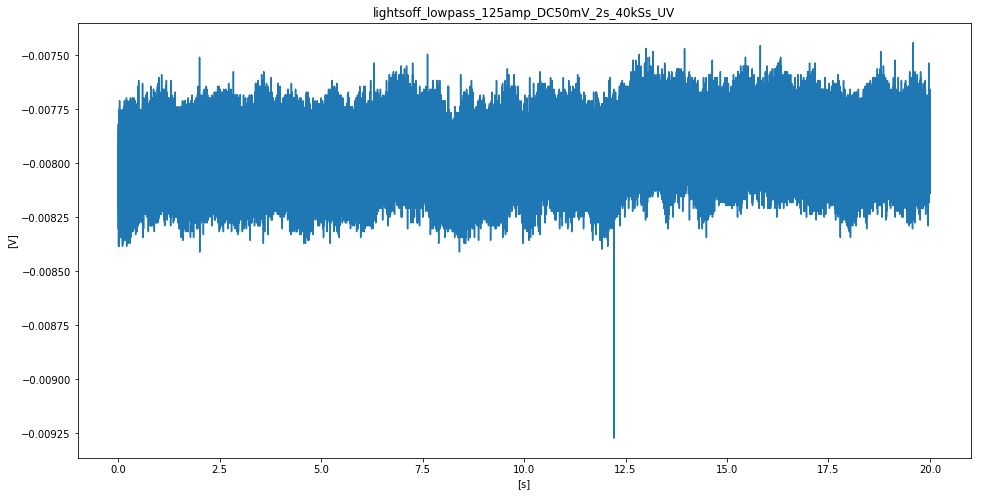

In [8]:
fname = "lightsoff_lowpass_125amp_DC50mV_2s_40kSs_UV.hws"
quick_analyze(data_loc+fname)

mean signal : -7.66e-03 V
ptp signal : 1.02e-03 V


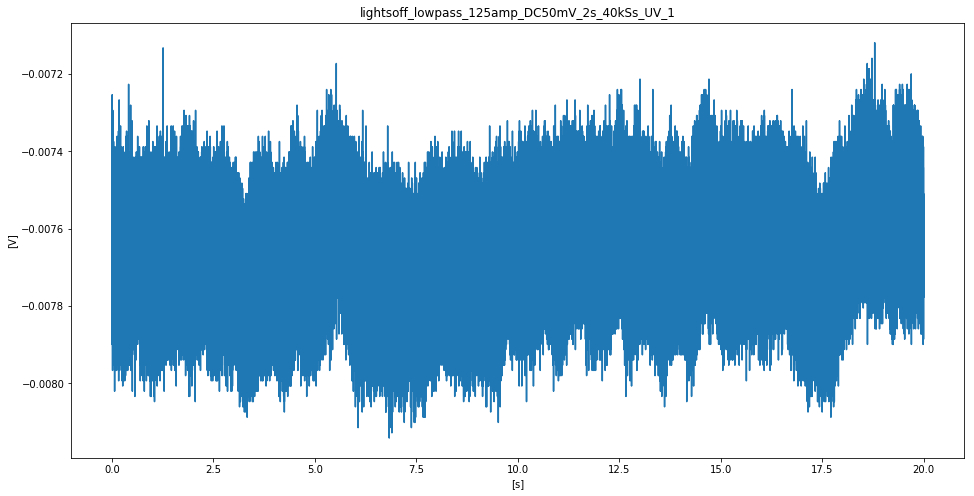

In [9]:
fname = "lightsoff_lowpass_125amp_DC50mV_2s_40kSs_UV_1.hws"
quick_analyze(data_loc+fname)

# No Amplifier, no low pass filter

## Lights off; UV off

In [10]:
data_loc = "Data/2018_12_19/no_inputamp/"

mean signal : -9.13e-04 V
ptp signal : 1.47e-03 V


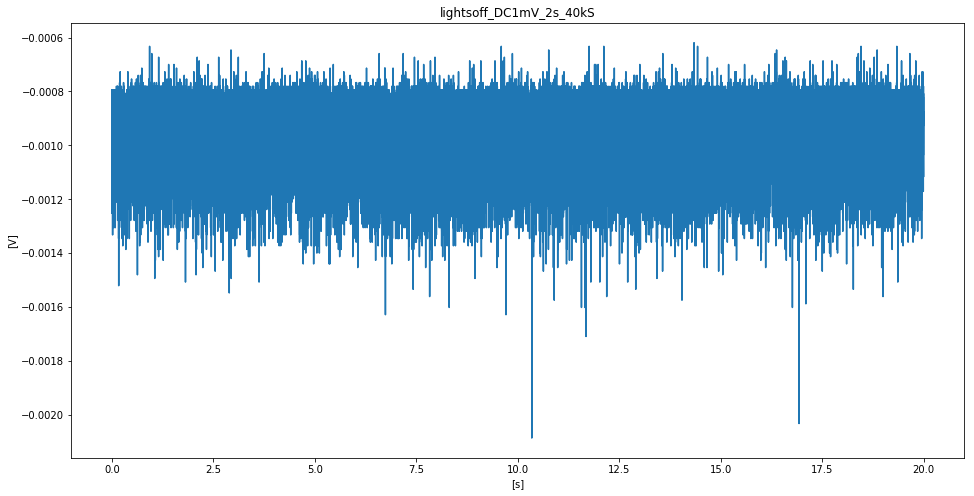

In [11]:
fname = "lightsoff_DC1mV_2s_40kSs.hws"
quick_analyze(data_loc+fname)

## Lights off; UV on

mean signal : -1.45e-03 V
ptp signal : 3.12e-03 V


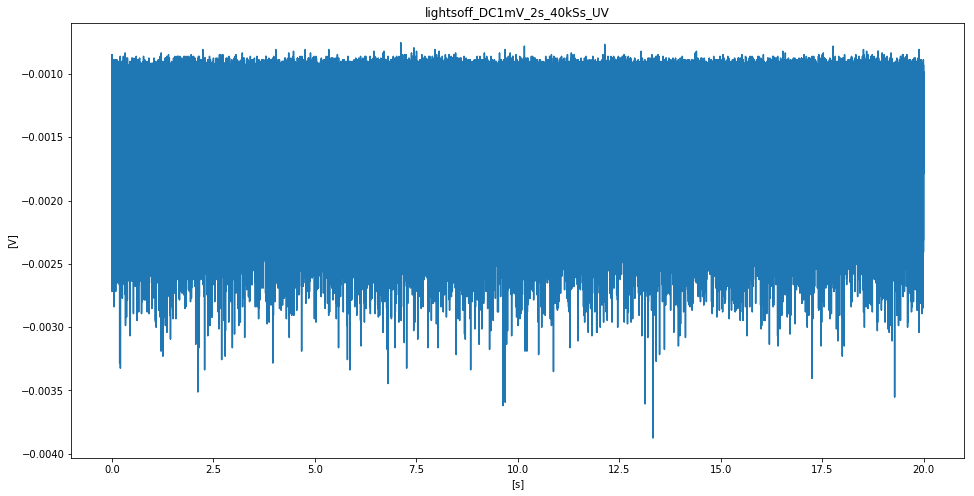

In [12]:
fname = "lightsoff_DC1mV_2s_40kSs_UV.hws"
quick_analyze(data_loc+fname)

# No Amplifier, low pass filter

## Lights off; UV off

mean signal : -2.18e-03 V
ptp signal : 4.17e-04 V


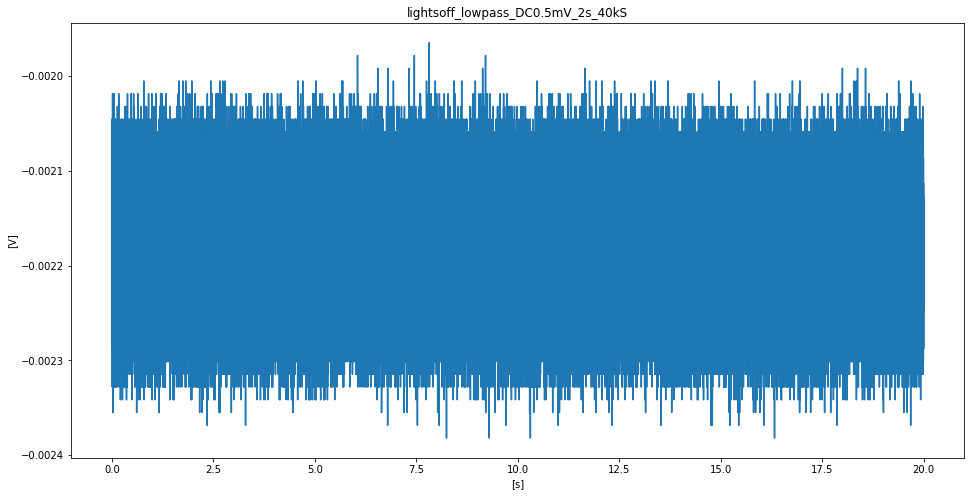

In [13]:
fname = "lightsoff_lowpass_DC0.5mV_2s_40kSs.hws"
quick_analyze(data_loc+fname)

## Lights off; UV on

mean signal : -2.19e-03 V
ptp signal : 4.17e-04 V


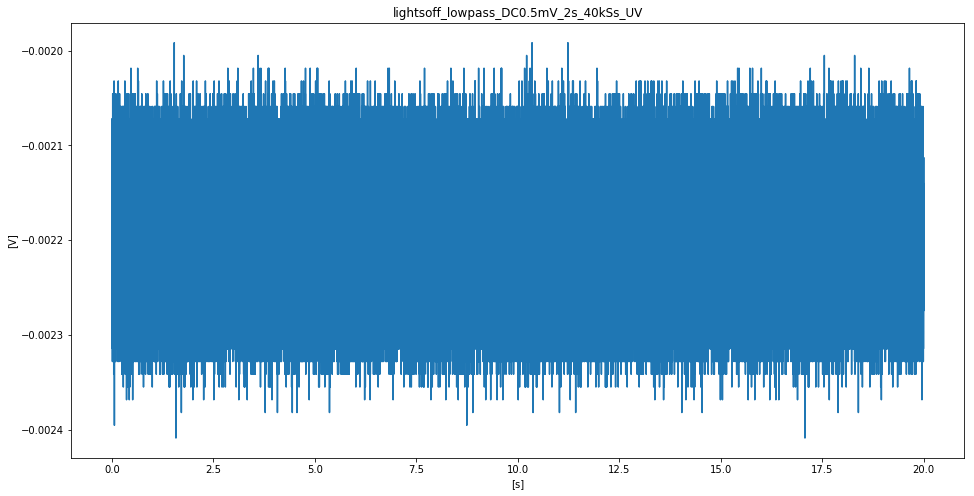

In [14]:
fname = "lightsoff_lowpass_DC0.5mV_2s_40kSs_UV.hws"
quick_analyze(data_loc+fname)

# Lowpass filter, 500 Ohm input impedance SRS445A, 125x amplification

## Lights off; UV off

In [15]:
data_loc = "Data/2018_12_19/500Ohm_inputamp/"

mean signal : 9.39e-03 V
ptp signal : 5.52e-04 V


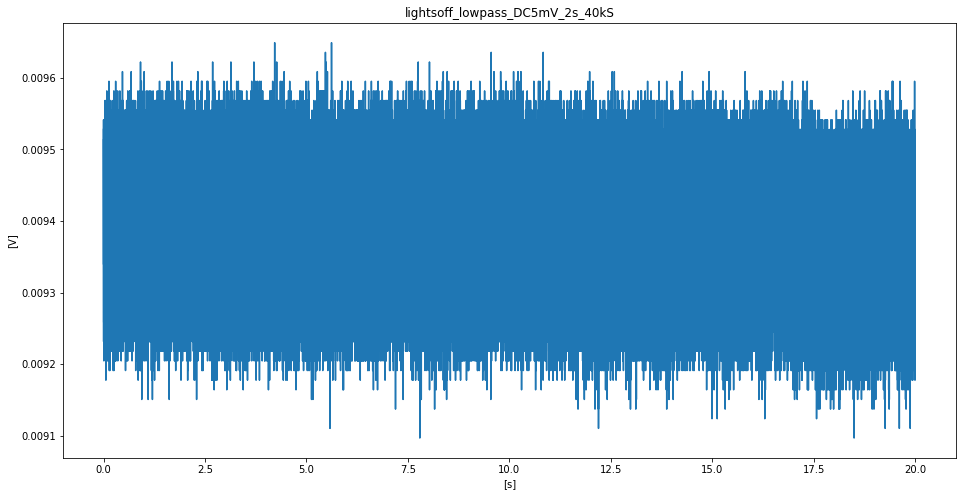

In [16]:
fname = "lightsoff_lowpass_DC5mV_2s_40kSs.hws"
quick_analyze(data_loc+fname)

## Lights off; UV on

mean signal : -9.87e-03 V
ptp signal : 4.52e-03 V


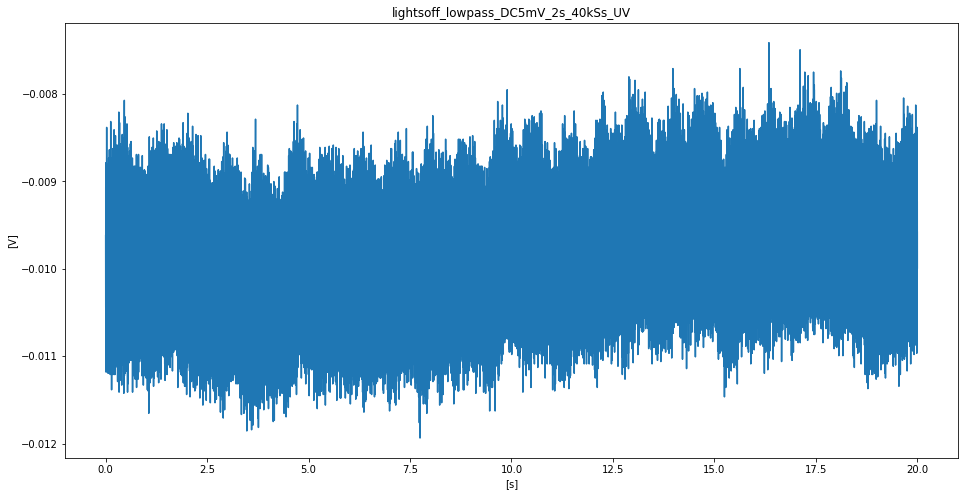

In [17]:
fname = "lightsoff_lowpass_DC5mV_2s_40kSs_UV.hws"
quick_analyze(data_loc+fname)